# Customer Churn Analysis Project

#### Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score,auc,confusion_matrix,plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\user\Desktop\internship\data\DSData-master\Telecom_customer_churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape  # number of rows and columns

(7043, 21)

In [5]:
df.columns   # alll columns in the data set

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info() #checking the types of the object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop_duplicates(inplace=True)   # dropping duplicates if any

In [8]:
df.shape   # as there is no duplicate entries shape of data is same

(7043, 21)

In the churn dataset, the number of rows is 7043 and the number of columns is 21. There are 18 columns that are object types, and the other columns that are left are of integer and float types.

In [9]:
# Now we will check wheather there is null value present or not
df.isnull().sum()  # As there is no null values present in data we will move forward

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


Gender, partner, dependents, Phone Service, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Paperless Billing, and Churn values will now be modified.

The object type "Yes or No" has the values for each of these options. Then, we convert these values to integers "0" or "1".

In [11]:
print(df['gender'].value_counts())
print(df['Partner'].value_counts())
print(df['Dependents'].value_counts())
print(df['SeniorCitizen'].value_counts())
print(df['PhoneService'].value_counts())
print(df['MultipleLines'].value_counts())
print(df['InternetService'].value_counts())
print(df['OnlineSecurity'].value_counts())
print(df['OnlineBackup'].value_counts())
print(df['DeviceProtection'].value_counts())
print(df['TechSupport'].value_counts())
print(df['StreamingTV'].value_counts())
print(df['StreamingMovies'].value_counts())
print(df['Contract'].value_counts())
print(df['PaperlessBilling'].value_counts())
print(df['PaymentMethod'].value_counts())
print(df['Churn'].value_counts())


Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [12]:
import pandas as pd

# Create a dictionary mapping the original values to the corresponding integer values
mapping = {'Yes': 0, 'No': 1,'No internet service':2}

# Defining the columns want to replace the values for
columns_to_replace = ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                      'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# replace the values using the mapping dictionary
for column in columns_to_replace:
    df[column] = df[column].map(mapping)

# the updated DataFrame
print(df)


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        0           1       1   
1     5575-GNVDE    Male              0        1           1      34   
2     3668-QPYBK    Male              0        1           1       2   
3     7795-CFOCW    Male              0        1           1      45   
4     9237-HQITU  Female              0        1           1       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        0           0      24   
7039  2234-XADUH  Female              0        0           0      72   
7040  4801-JZAZL  Female              0        0           0      11   
7041  8361-LTMKD    Male              1        0           1       4   
7042  3186-AJIEK    Male              0        1           1      66   

      PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
0                1  No phone service             DSL      

Columns that should have changed with values are now changed


In [13]:
# mapping of gender values
map_gen = {'Male': 0, 'Female': 1}
# Now replce the old values with new one
df['gender']=df['gender'].map(map_gen)

# mapping of multiplelines values
map_mul={'Yes': 0, 'No': 1, 'No phone service': 2}
# Now replce the old values with new one
df['MultipleLines']=df['MultipleLines'].map(map_mul)

# print dataset
print(df)


      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       1              0        0           1       1   
1     5575-GNVDE       0              0        1           1      34   
2     3668-QPYBK       0              0        1           1       2   
3     7795-CFOCW       0              0        1           1      45   
4     9237-HQITU       1              0        1           1       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       0              0        0           0      24   
7039  2234-XADUH       1              0        0           0      72   
7040  4801-JZAZL       1              0        0           0      11   
7041  8361-LTMKD       0              1        0           1       4   
7042  3186-AJIEK       0              0        1           1      66   

      PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0                1              2             DSL            

In [14]:
df.isnull().sum().sum()   # after modifying values checking is there any null values or not

0

In [15]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,1,1,2,DSL,1,...,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,1,1,34,0,1,DSL,0,...,0,1,1,1,One year,1,Mailed check,56.95,1889.5,1
2,3668-QPYBK,0,0,1,1,2,0,1,DSL,0,...,1,1,1,1,Month-to-month,0,Mailed check,53.85,108.15,0
3,7795-CFOCW,0,0,1,1,45,1,2,DSL,0,...,0,0,1,1,One year,1,Bank transfer (automatic),42.30,1840.75,1
4,9237-HQITU,1,0,1,1,2,0,1,Fiber optic,1,...,1,1,1,1,Month-to-month,0,Electronic check,70.70,151.65,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.516967,0.499748,0.00,0.0,1.00,1.00,1.00
Dependents,7043.0,0.700412,0.458110,0.00,0.0,1.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.096834,0.295752,0.00,0.0,0.00,0.00,1.00
MultipleLines,7043.0,0.674996,0.642730,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.930001,0.706051,0.00,0.0,1.00,1.00,2.00
OnlineBackup,7043.0,0.871788,0.738369,0.00,0.0,1.00,1.00,2.00
DeviceProtection,7043.0,0.872781,0.737868,0.00,0.0,1.00,1.00,2.00


#### Performing EDA

Now we will take look on churn vs all columns what there data is representing.

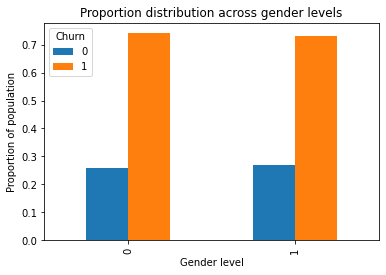

In [19]:
# Create a DataFrame containing the proportion distribution of Churn across gender levels
Churn = round(pd.crosstab(df.gender, df.Churn).div(pd.crosstab(df.gender, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

plt.show()

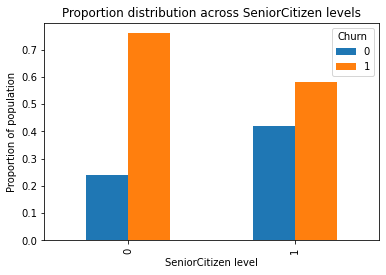

In [20]:
# Create a DataFrame containing the proportion distribution of Churn across SeniorCitizen levels
Churn = round(pd.crosstab(df.SeniorCitizen, df.Churn).div(pd.crosstab(df.SeniorCitizen, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame by the column 
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across SeniorCitizen levels')
ax.set_xlabel('SeniorCitizen level')
ax.set_ylabel('Proportion of population')

plt.show()

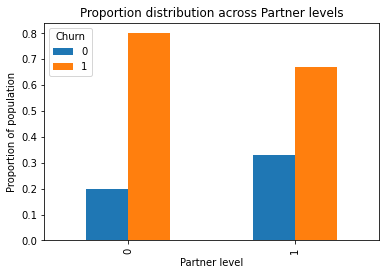

In [21]:
# Create a DataFrame containing the proportion distribution of Churn across Partner levels
Churn = round(pd.crosstab(df.Partner, df.Churn).div(pd.crosstab(df.Partner, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across Partner levels')
ax.set_xlabel('Partner level')
ax.set_ylabel('Proportion of population')

plt.show()

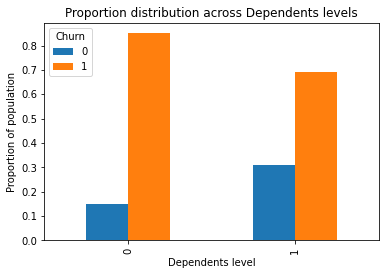

In [27]:
# Create a DataFrame containing the proportion distribution of Churn across Dependents levels
Churn = round(pd.crosstab(df.Dependents, df.Churn).div(pd.crosstab(df.Dependents, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across Dependents levels')
ax.set_xlabel('Dependents level')
ax.set_ylabel('Proportion of population')

plt.show()

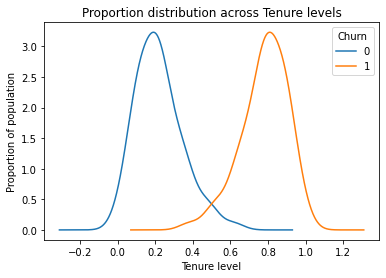

In [30]:
# Create a DataFrame containing the proportion distribution of Churn across tenure levels
Churn = round(pd.crosstab(df.tenure, df.Churn).div(pd.crosstab(df.tenure, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='kde', title='Proportion distribution across Tenure levels')
ax.set_xlabel('Tenure level')
ax.set_ylabel('Proportion of population')

plt.show()

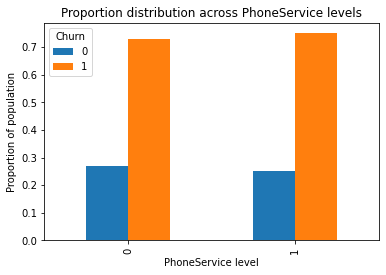

In [31]:
# Create a DataFrame containing the proportion distribution of Churn across PhoneService levels
Churn = round(pd.crosstab(df.PhoneService, df.Churn).div(pd.crosstab(df.PhoneService, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across PhoneService levels')
ax.set_xlabel('PhoneService level')
ax.set_ylabel('Proportion of population')

plt.show()

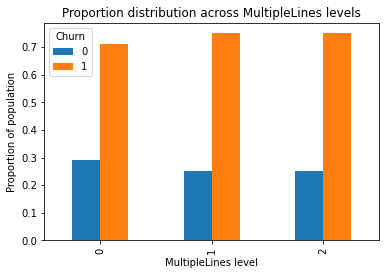

In [32]:
# Create a DataFrame containing the proportion distribution of Churn across MultipleLines levels
Churn = round(pd.crosstab(df.MultipleLines, df.Churn).div(pd.crosstab(df.MultipleLines, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across MultipleLines levels')
ax.set_xlabel('MultipleLines level')
ax.set_ylabel('Proportion of population')

plt.show()

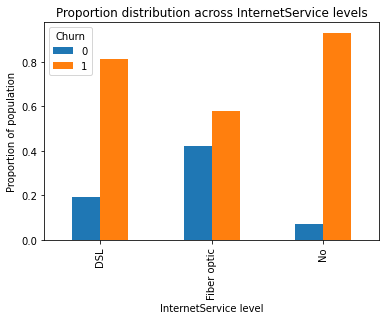

In [33]:
# Create a DataFrame containing the proportion distribution of Churn across InternetService levels
Churn = round(pd.crosstab(df.InternetService, df.Churn).div(pd.crosstab(df.InternetService, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across InternetService levels')
ax.set_xlabel('InternetService level')
ax.set_ylabel('Proportion of population')

plt.show()

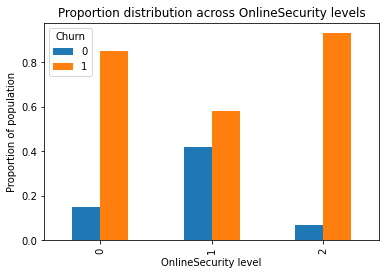

In [34]:
# Create a DataFrame containing the proportion distribution of Churn across OnlineSecurity levels
Churn = round(pd.crosstab(df.OnlineSecurity, df.Churn).div(pd.crosstab(df.OnlineSecurity, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across OnlineSecurity levels')
ax.set_xlabel('OnlineSecurity level')
ax.set_ylabel('Proportion of population')

plt.show()

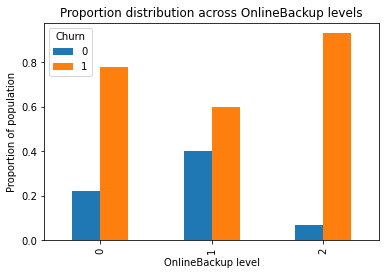

In [35]:
# Create a DataFrame containing the proportion distribution of Churn across OnlineBackup levels
Churn = round(pd.crosstab(df.OnlineBackup, df.Churn).div(pd.crosstab(df.OnlineBackup, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across OnlineBackup levels')
ax.set_xlabel('OnlineBackup level')
ax.set_ylabel('Proportion of population')

plt.show()

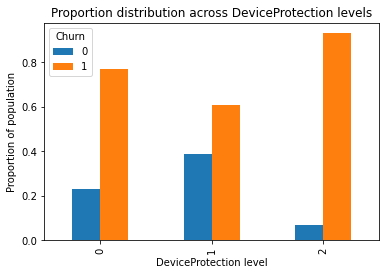

In [36]:
# Create a DataFrame containing the proportion distribution of Churn across DeviceProtection levels
Churn = round(pd.crosstab(df.DeviceProtection, df.Churn).div(pd.crosstab(df.DeviceProtection, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across DeviceProtection levels')
ax.set_xlabel('DeviceProtection level')
ax.set_ylabel('Proportion of population')

plt.show()

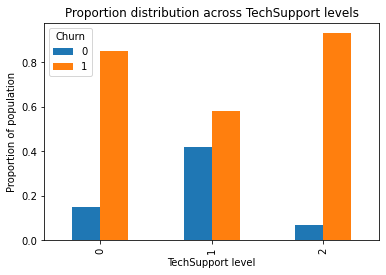

In [37]:
# Create a DataFrame containing the proportion distribution of Churn across TechSupport levels
Churn = round(pd.crosstab(df.TechSupport, df.Churn).div(pd.crosstab(df.TechSupport, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across TechSupport levels')
ax.set_xlabel('TechSupport level')
ax.set_ylabel('Proportion of population')

plt.show()

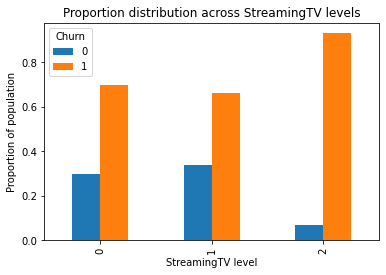

In [38]:
# Create a DataFrame containing the proportion distribution of Churn across StreamingTV levels
Churn = round(pd.crosstab(df.StreamingTV, df.Churn).div(pd.crosstab(df.StreamingTV, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across StreamingTV levels')
ax.set_xlabel('StreamingTV level')
ax.set_ylabel('Proportion of population')

plt.show()

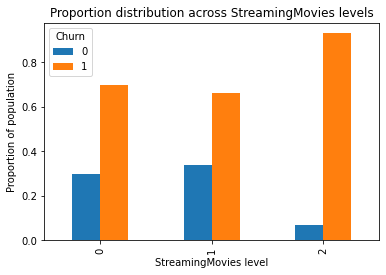

In [39]:
# Create a DataFrame containing the proportion distribution of Churn across StreamingMovies levels
Churn = round(pd.crosstab(df.StreamingMovies, df.Churn).div(pd.crosstab(df.StreamingMovies, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across StreamingMovies levels')
ax.set_xlabel('StreamingMovies level')
ax.set_ylabel('Proportion of population')

plt.show()

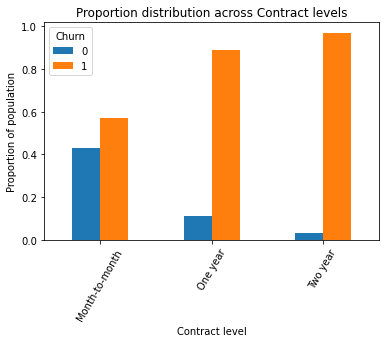

In [42]:
# Create a DataFrame containing the proportion distribution of Churn across Contract levels
Churn = round(pd.crosstab(df.Contract, df.Churn).div(pd.crosstab(df.Contract, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across Contract levels',rot=60)
ax.set_xlabel('Contract level')
ax.set_ylabel('Proportion of population')

plt.show()

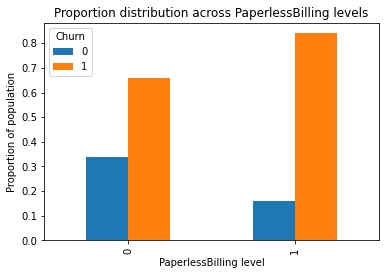

In [43]:
# Create a DataFrame containing the proportion distribution of Churn across PaperlessBilling levels
Churn = round(pd.crosstab(df.PaperlessBilling, df.Churn).div(pd.crosstab(df.PaperlessBilling, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across PaperlessBilling levels')
ax.set_xlabel('PaperlessBilling level')
ax.set_ylabel('Proportion of population')

plt.show()

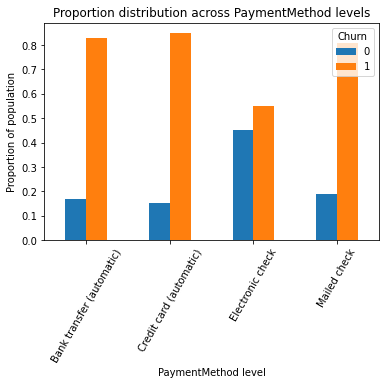

In [45]:
# Create a DataFrame containing the proportion distribution of Churn across PaymentMethod levels
Churn = round(pd.crosstab(df.PaymentMethod, df.Churn).div(pd.crosstab(df.PaymentMethod, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='bar', title='Proportion distribution across PaymentMethod levels',rot=60)
ax.set_xlabel('PaymentMethod level')
ax.set_ylabel('Proportion of population')

plt.show()

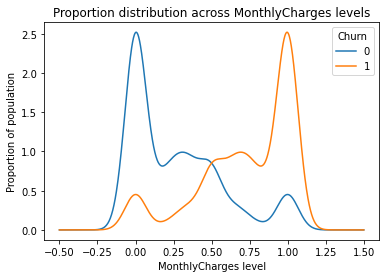

In [47]:
# Create a DataFrame containing the proportion distribution of Churn across MonthlyCharges levels
Churn = round(pd.crosstab(df.MonthlyCharges, df.Churn).div(pd.crosstab(df.MonthlyCharges, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='kde', title='Proportion distribution across MonthlyCharges levels')
ax.set_xlabel('MonthlyCharges level')
ax.set_ylabel('Proportion of population')

plt.show()

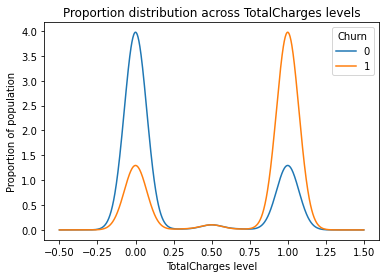

In [48]:
# Create a DataFrame containing the proportion distribution of Churn across TotalCharges levels
Churn = round(pd.crosstab(df.TotalCharges, df.Churn).div(pd.crosstab(df.TotalCharges, df.Churn).apply(sum,1),0), 2)

# Sort the DataFrame
sorted_churn = Churn

# Plot the bar graph
ax = sorted_churn.plot(kind='kde', title='Proportion distribution across TotalCharges levels')
ax.set_xlabel('TotalCharges level')
ax.set_ylabel('Proportion of population')

plt.show()

In [50]:
df.corr()['Churn'].sort_values()

MonthlyCharges     -0.193356
Dependents         -0.164221
SeniorCitizen      -0.150889
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
OnlineSecurity      0.023309
TechSupport         0.027037
MultipleLines       0.036310
OnlineBackup        0.074205
DeviceProtection    0.084654
StreamingMovies     0.163220
StreamingTV         0.164673
PaperlessBilling    0.191825
tenure              0.352229
Churn               1.000000
Name: Churn, dtype: float64

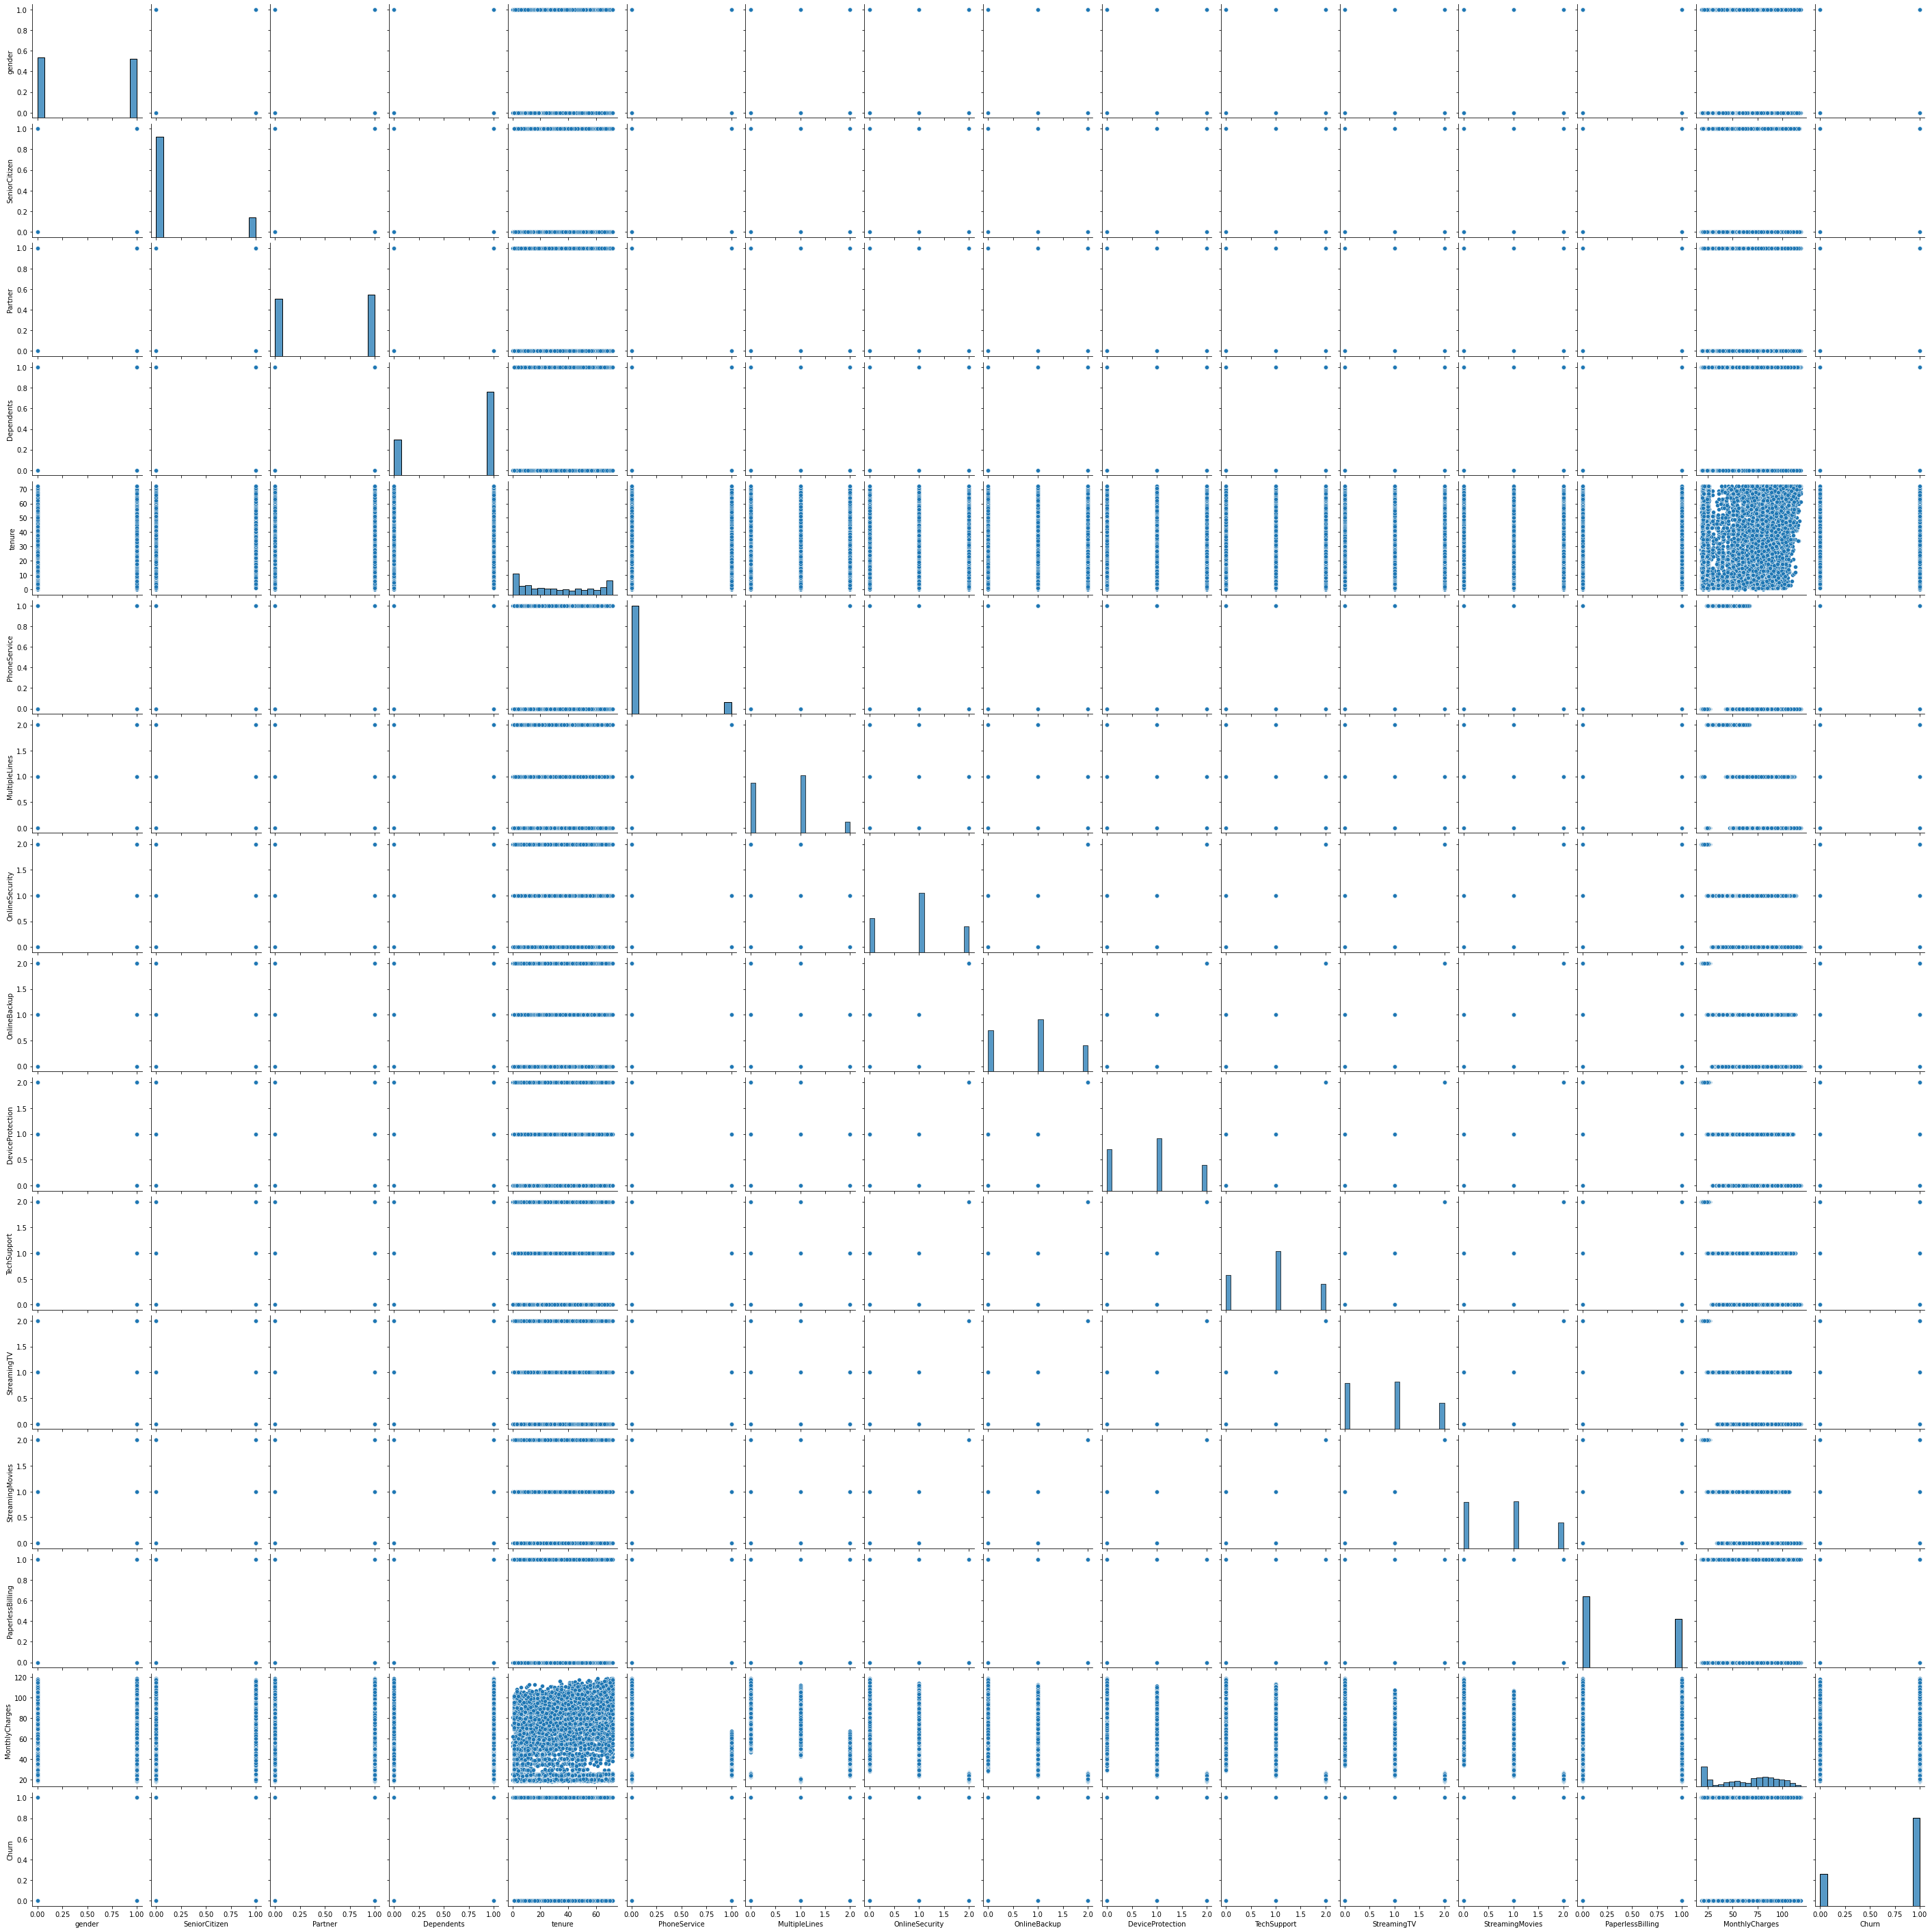

In [51]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

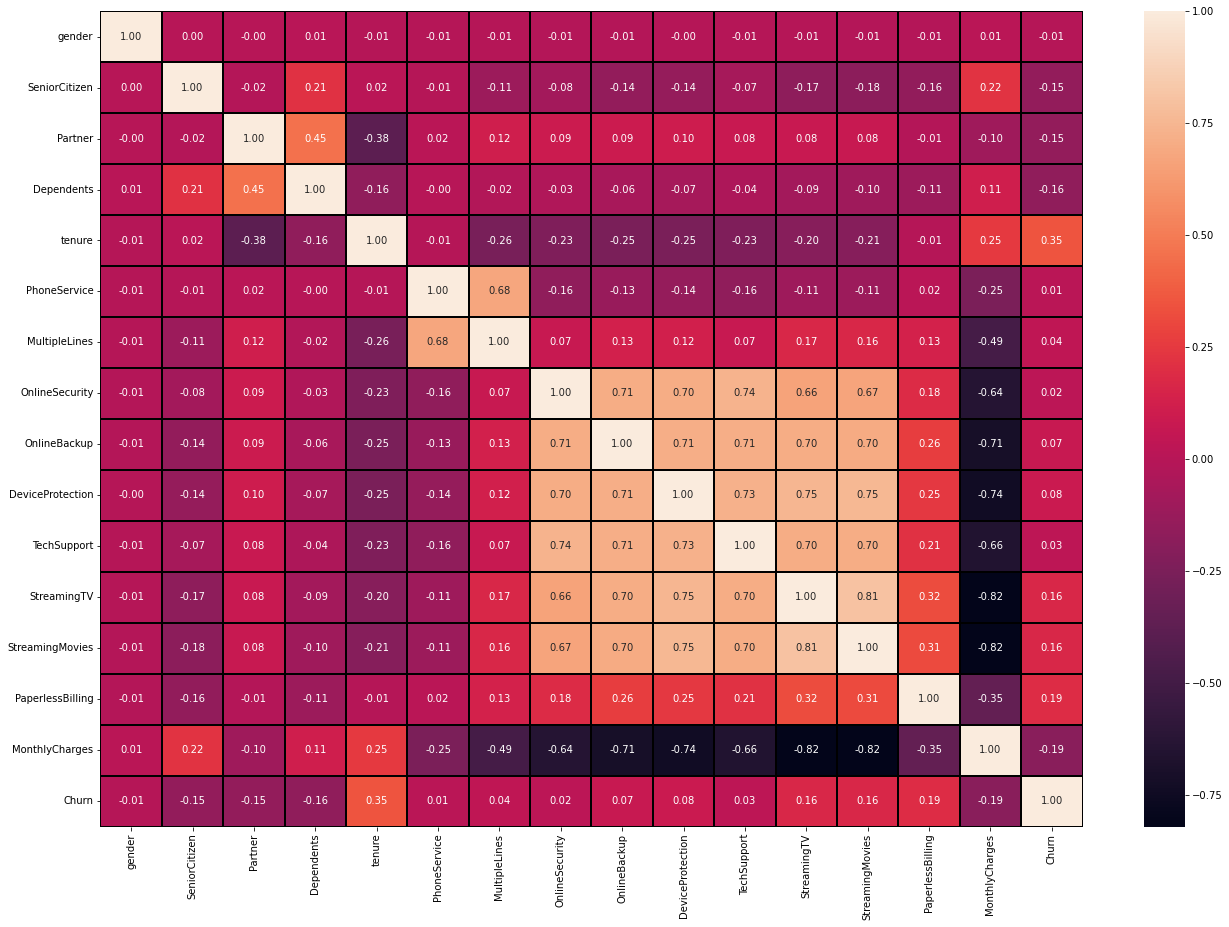

In [53]:
# plotting heat map
plt.figure(figsize=(22,15)) # ploting the heat map
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [54]:
# now checkinh for skewness presemnt in data
df.skew()

gender              0.019031
SeniorCitizen       1.833633
Partner            -0.067922
Dependents         -0.875199
tenure              0.239540
PhoneService        2.727153
MultipleLines       0.422184
OnlineSecurity      0.099522
OnlineBackup        0.207678
DeviceProtection    0.205705
TechSupport         0.105614
StreamingTV         0.288858
StreamingMovies     0.296405
PaperlessBilling    0.375396
MonthlyCharges     -0.220524
Churn              -1.063031
dtype: float64

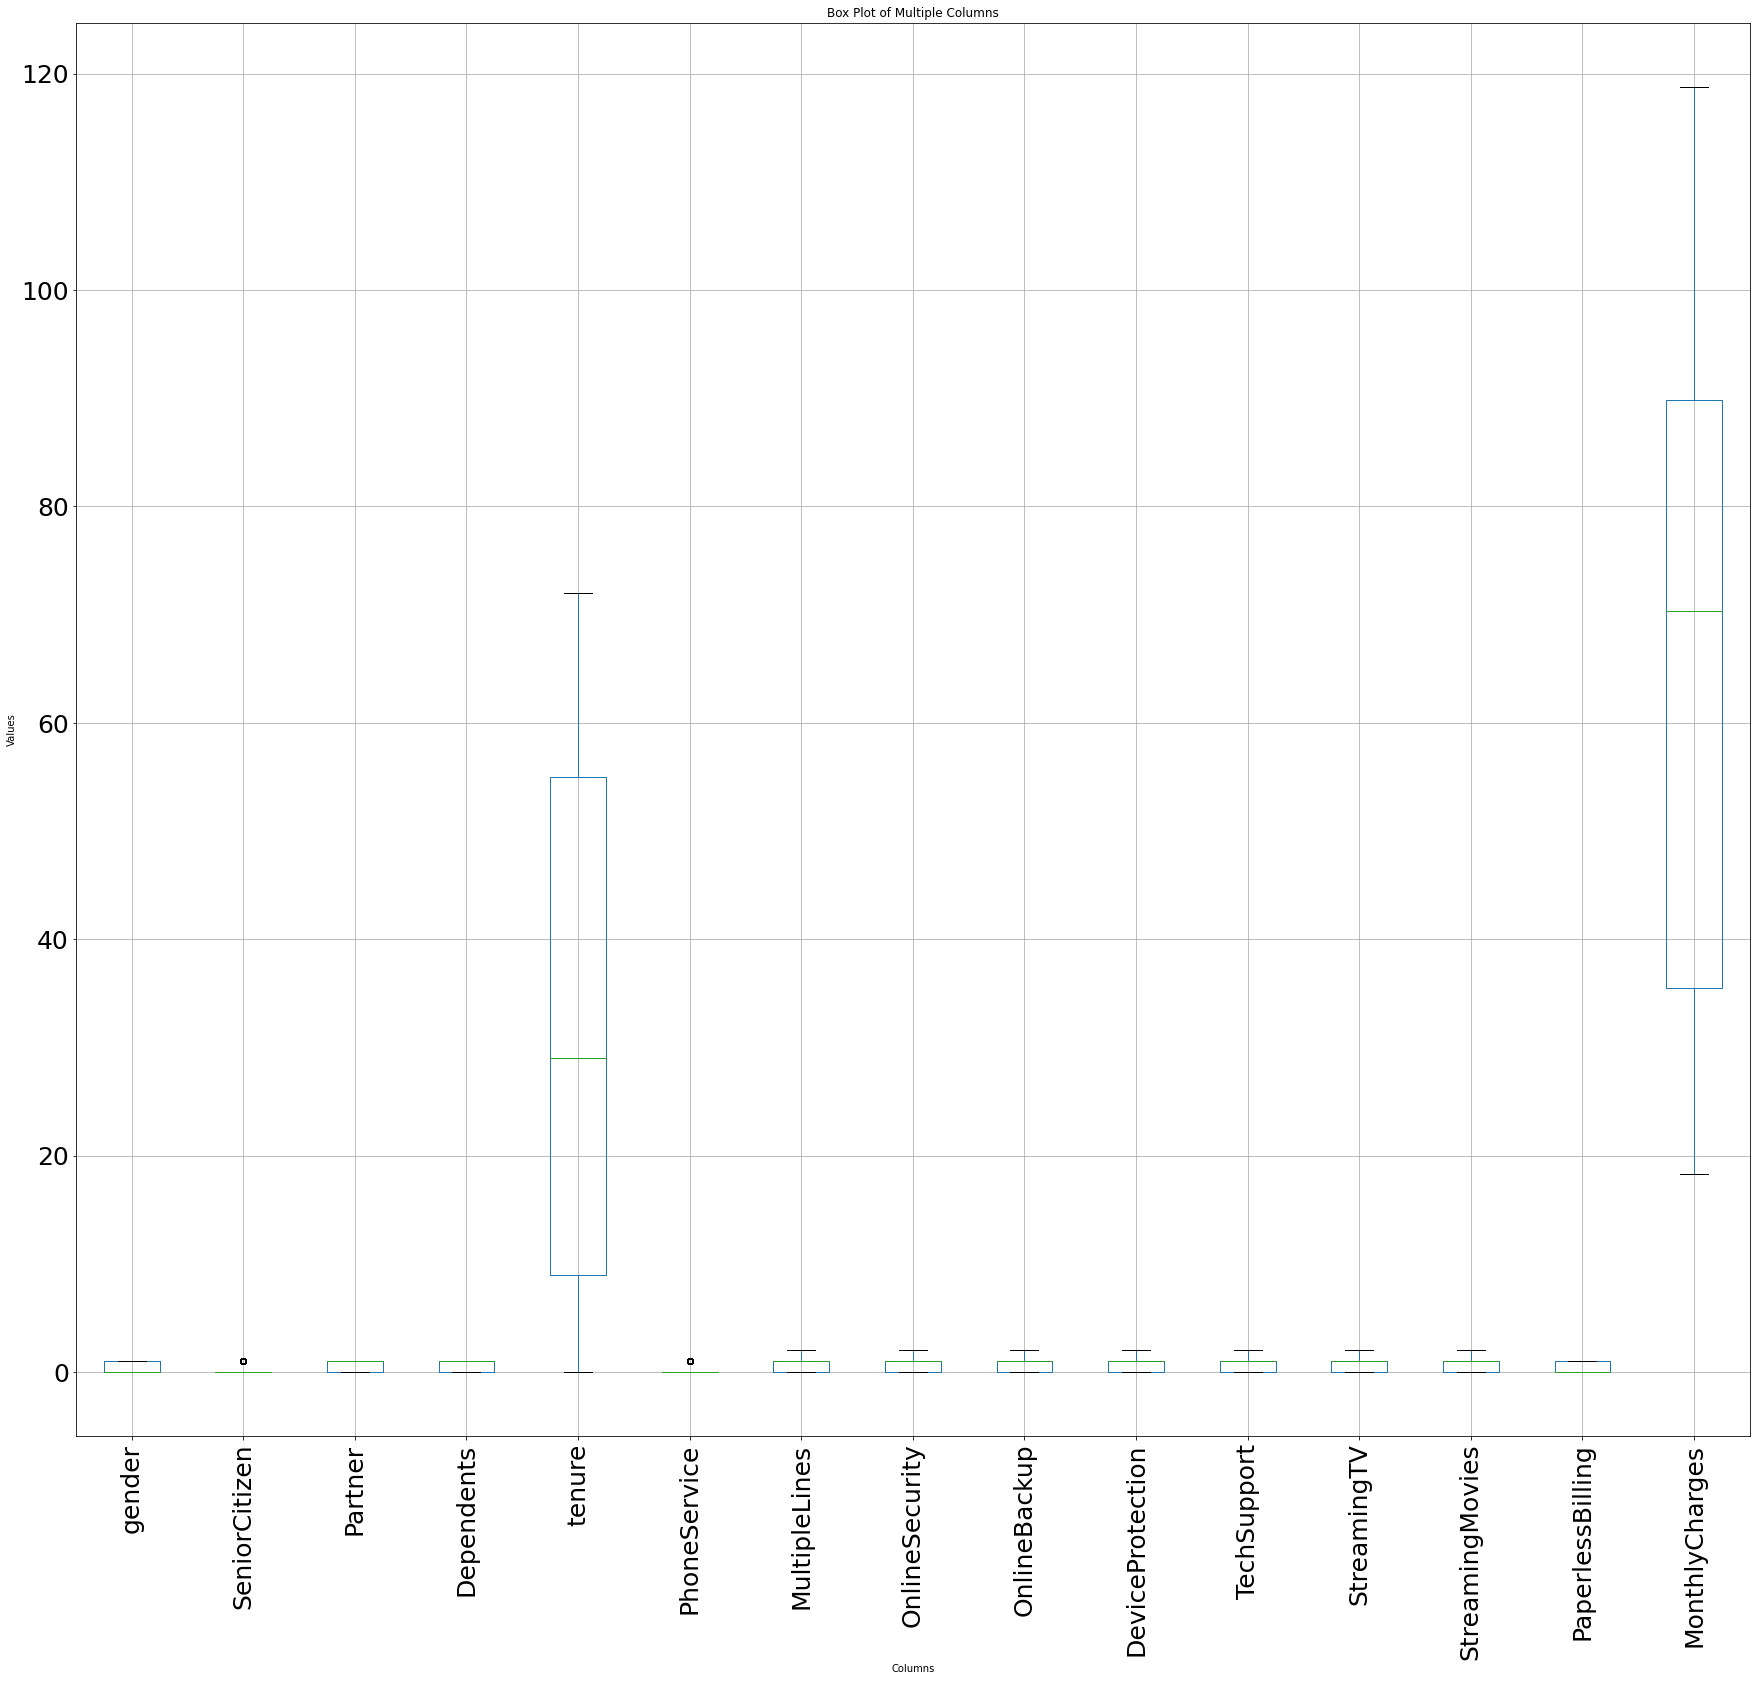

In [59]:
# Checking for outliers by plotting box plot
columns= ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'StreamingTV', 'StreamingMovies','PaperlessBilling','MonthlyCharges']
# Create the box plot
plt.figure(figsize=(30,26))
df.boxplot(column=columns,fontsize=25)

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Multiple Columns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

WE will remove outliers from the data by importing z score method. First wew ill drop those columns which is less use with data df

In [61]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,1,1,1,2,DSL,1,...,1,1,1,1,Month-to-month,0,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,1,1,34,0,1,DSL,0,...,0,1,1,1,One year,1,Mailed check,56.95,1889.5,1


In [63]:
df=df.drop(columns=['customerID','InternetService','Contract','PaymentMethod','MonthlyCharges','TotalCharges'],axis=1)

In [64]:
#checking data after dropping columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

percentage of loss of data by zscore is : 0.09683373562402385


In [70]:
# now we willseprate features and labels
features=df1.drop('Churn',axis=1)
labels=df1.Churn

In [71]:
#scaling the data
scalar=PowerTransformer()
scaled_f=scalar.fit_transform(features)

In [72]:
scaled_f.shape

(6361, 14)

In [73]:
features.shape

(6361, 14)

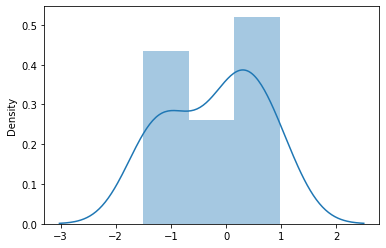

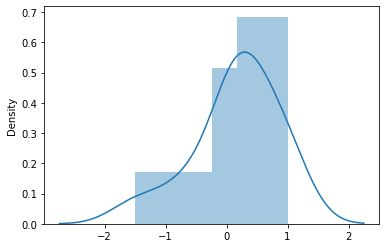

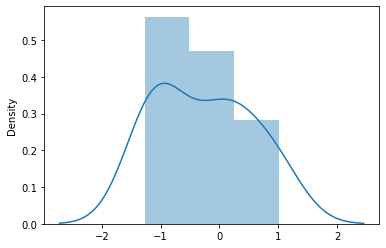

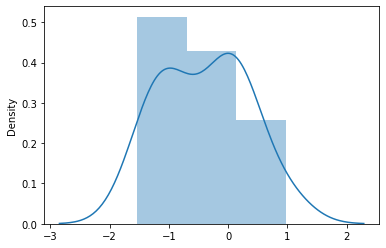

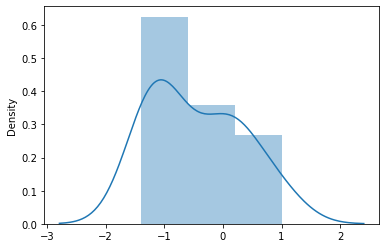

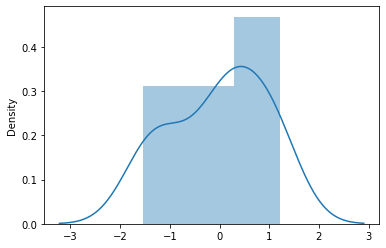

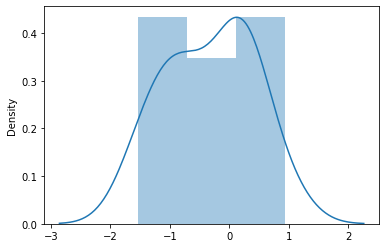

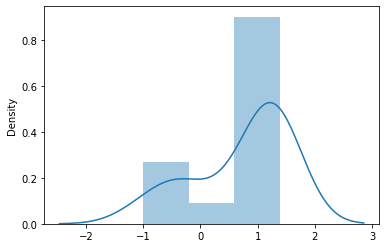

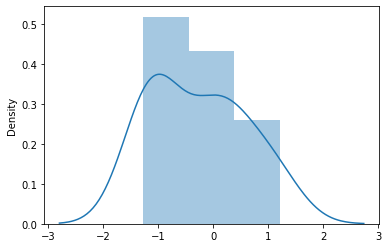

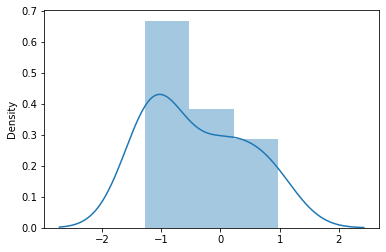

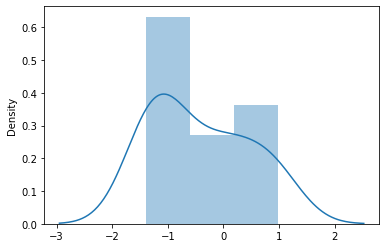

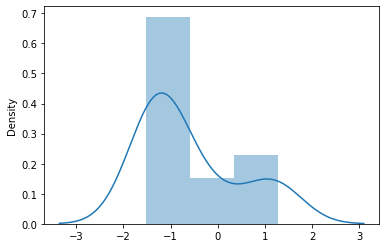

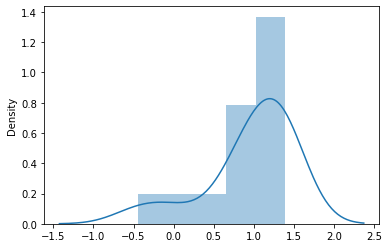

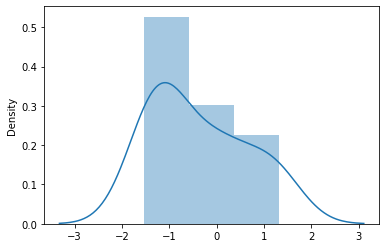

In [75]:
# visualize data after power transform
x1=scaled_f
for i in range(1,15):
    sns.distplot(x1[i])
    plt.show()

In [76]:
# now we will get the highly correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

5

In [78]:
corr_features

{'DeviceProtection',
 'OnlineBackup',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport'}

In [79]:
# checking the correlation with target column Churn
df1.corr()['Churn'].sort_values()

Dependents         -0.159481
Partner            -0.154692
SeniorCitizen      -0.148802
gender             -0.011212
MultipleLines       0.040207
OnlineSecurity      0.048136
TechSupport         0.053417
OnlineBackup        0.091744
DeviceProtection    0.106515
StreamingMovies     0.178794
StreamingTV         0.182298
PaperlessBilling    0.196368
tenure              0.349681
Churn               1.000000
PhoneService             NaN
Name: Churn, dtype: float64

<AxesSubplot:title={'center':'Correlation with target'}>

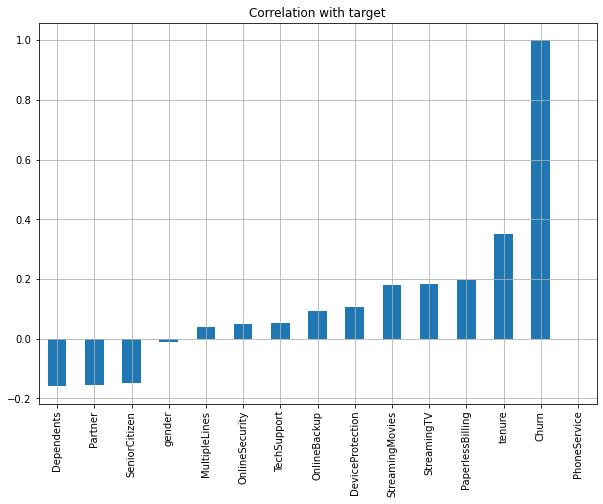

In [80]:
df1.corr()['Churn'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')
# graphical representation of columns correaltiion with target columns


In [83]:
# dropping less correalted columns with target and putting them in X and y
X=df1.drop(columns=['gender','Dependents','Partner','SeniorCitizen'],axis=1)
y=df1['Churn']

In [84]:
# now we will scale it again by using Standard Scaler
scaler=StandardScaler()
Scaled=scaler.fit_transform(X)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (Scaled, i) for i in range (Scaled.shape[1])]
vif["Features"] = X.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,1.436265,tenure
1,NaN,PhoneService
2,1.295368,MultipleLines
3,2.947069,OnlineSecurity
4,3.093171,OnlineBackup
5,3.484368,DeviceProtection
6,3.308325,TechSupport
7,3.943609,StreamingTV
8,3.947759,StreamingMovies
9,1.173666,PaperlessBilling


In [86]:
# importing libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [87]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [89]:
# Define dataset
X, y = make_classification(n_samples=250, weights=[0.193], flip_y=0)

# Summarize class distribution
print("Original class distribution:")
print(Counter(y))

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Summarize class distribution
print("Oversampled class distribution:")
print(Counter(y_over))

Original class distribution:
Counter({1: 201, 0: 49})
Oversampled class distribution:
Counter({1: 201, 0: 201})


Nw we will train or test the data and will check there accuracy

#### Apply ML

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [95]:
# For Logestic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
train_accuracy=accuracy_score(y_test,predlr)*100
test_accuracy=accuracy_score(y_train,pred_train_lr)*100
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

[[ 8  3]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.94      0.98      0.96        52

    accuracy                           0.94        63
   macro avg       0.92      0.85      0.88        63
weighted avg       0.93      0.94      0.93        63



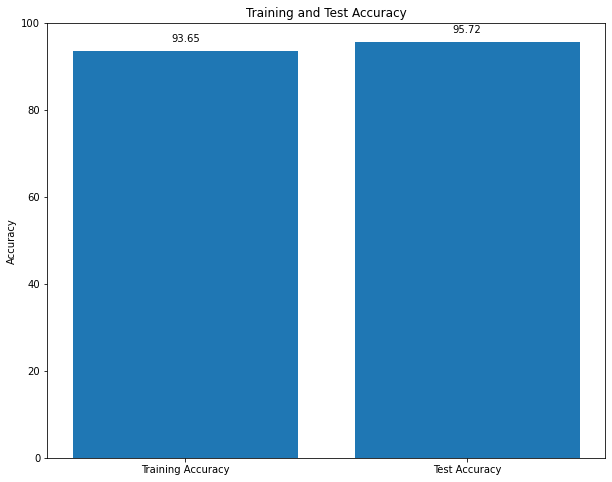

In [97]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()


### KNN model

In [102]:
# For KNN
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
test_accuracy=accuracy_score(y_test,predKNN)*100
train_accuracy=accuracy_score(y_train,pred_train_KNN)*100
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

[[ 9  2]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.96      0.98      0.97        52

    accuracy                           0.95        63
   macro avg       0.93      0.90      0.91        63
weighted avg       0.95      0.95      0.95        63



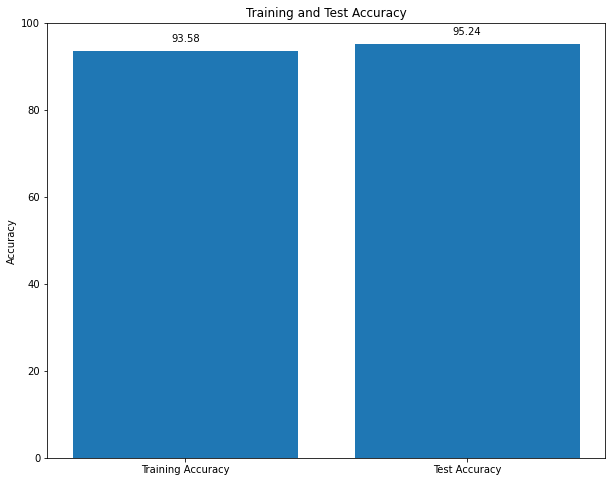

In [103]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Decision Tree Model

In [105]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
test_accuracy=accuracy_score(y_test,preddt)*100
train_accuracy=accuracy_score(y_train,pred_train_dt)*100
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

[[10  1]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.98      0.98      0.98        52

    accuracy                           0.97        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.97      0.97      0.97        63



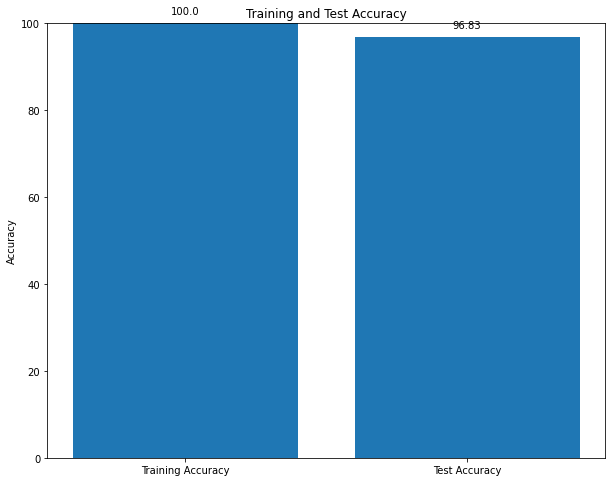

In [106]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Random Forest Model

In [107]:
# for RDF model
rdf =RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
test_accuracy=accuracy_score(y_test,predrdf)*100
train_accuracy=accuracy_score(y_train,pred_train_rdf)*100
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

[[ 8  3]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.94      0.98      0.96        52

    accuracy                           0.94        63
   macro avg       0.92      0.85      0.88        63
weighted avg       0.93      0.94      0.93        63



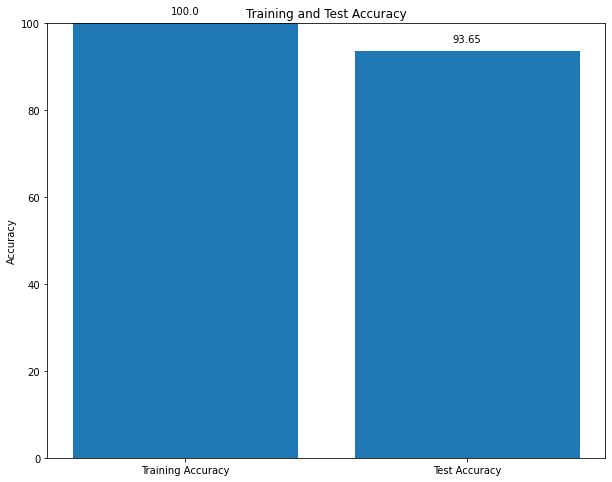

In [108]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Support Vector Model

In [109]:
# For SVC model
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
test_accuracy=accuracy_score(y_test,pred_svc)*100
train_accuracy=accuracy_score(y_train,pred_train_svc)*100
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[ 8  3]
 [ 1 51]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.94      0.98      0.96        52

    accuracy                           0.94        63
   macro avg       0.92      0.85      0.88        63
weighted avg       0.93      0.94      0.93        63



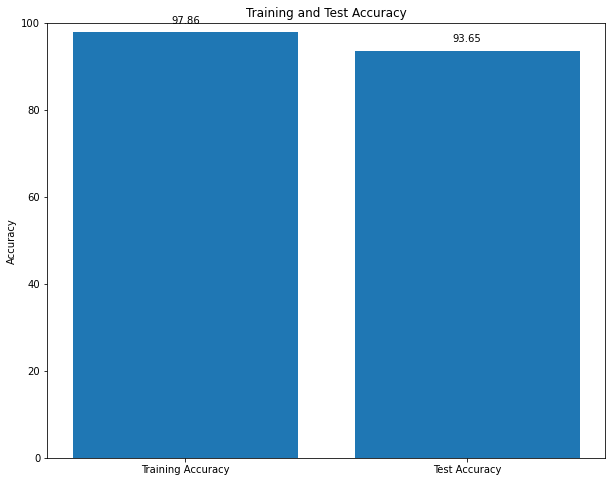

In [110]:
# Create a bar plot for training and testing accuracy
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]
plt.figure(figsize=(10,8))
plt.bar(labels, accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.ylim([0, 100])

# Add the accuracy values on top of the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 2, str(round(v, 2)), ha='center', color='black')

# Show the plot
plt.show()

### Checking for cross validation score

In [111]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 92.8


In [112]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 92.0


In [113]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 94.80000000000001


In [114]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 93.6


In [115]:
cr_5=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 92.0


The Decision Tree model is clearly the best fit model for our data set, as shown by the cross-validation score and testing score of all models, which showed that it had the greatest cross-validation score of 94.80% and the highest test accuracy of 96.83% among the others. As a result, we continue working with the DT model and tune its hyperparameters.

## Hyperparameter tunning 

In [120]:
DecisionTreeClassifier()
parameters={'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']}

GCV=GridSearchCV(estimator=DecisionTreeClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

In [121]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

95.23809523809523

### roc_auc curve

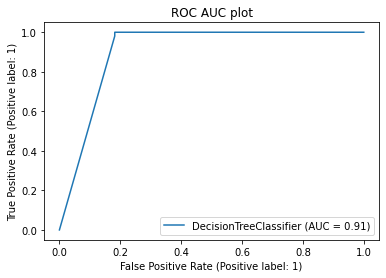

In [122]:
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 

## Conclusion

Customer churn analysis provides valuable insights into customer behavior and allows businesses to take proactive measures to retain customers. By understanding the factors influencing churn and leveraging predictive modeling techniques, businesses can develop targeted strategies to reduce customer attrition, enhance customer satisfaction, and drive growth